# The HR diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

This dataset has been collected by Deepraj Baidya and was originally published on Kaggle.


I'll take this as an opportunity to introduce `pandas` and `seaborn`, which are popular python packages. The are similar to `numpy` and `matplotlib`, but newer. I personally prefer my good old `numpy`, but these are very popular, so here is something you can do with them.

There are 6 star types that are encoded in the *'Star type'* column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.

We've seen this already last time. It is often grood practice to start with a statistical analysis of the dataset to answer the following questions:

- are there any missing values?
- are there NaNs in the X?

Star classification is something that can be done based on rules depending on temperature and luminosity. For example, Wikipedia gives the following example of a Hertzsprung-Russell diagram:

![HR_diagram.png](HR_diagram.png)

We can reproduce this diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two.
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

This is actually a very important lesson in machine learning: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is the usual machine-learning approach) standardize your data such that each dimension has mean=0 and variance=1.
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?

**Part 2. [Optional, not examinable]** 

For later: come back to this assignment after lecture 20

- Now run a supervised classification algorithm on this dataset.
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import urllib.request

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [64]:
# Import dataset
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x7f224e47a6b0>)

In [65]:
# Open dataset
df_stars = pd.read_csv("stars.csv")

df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [66]:
le = LabelEncoder()

# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


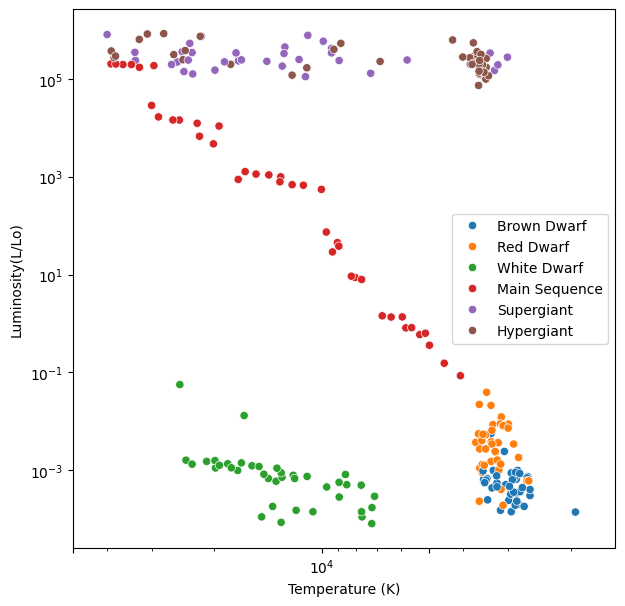

In [67]:
# Scatter plot in log-log scale
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.legend()
plt.show()

In [100]:
# Select numerical column
features = ['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)',	'Absolute magnitude(Mv)']
data = df_stars[features]

# check NaN values
if (data.isnull().values.any()):
    print("There are some NaN values in the dataframe!")
else:
    print("There aren't NaN values in the dataframe")

data

There aren't NaN values in the dataframe


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [69]:
# Apply log10 at Temperature, Luminosity and Radius
data_log = df_stars[features].copy()

data_log['Temperature (K)'] = np.log10(data_log['Temperature (K)'])
data_log['Luminosity(L/Lo)'] = np.log10(data_log['Luminosity(L/Lo)'])
data_log['Radius(R/Ro)'] = np.log10(data_log['Radius(R/Ro)'])

In [102]:
# Transform pandas datasets in numpy array
data = np.array(data)
data_log = np.array(data_log)

## PCA

### Raw Data

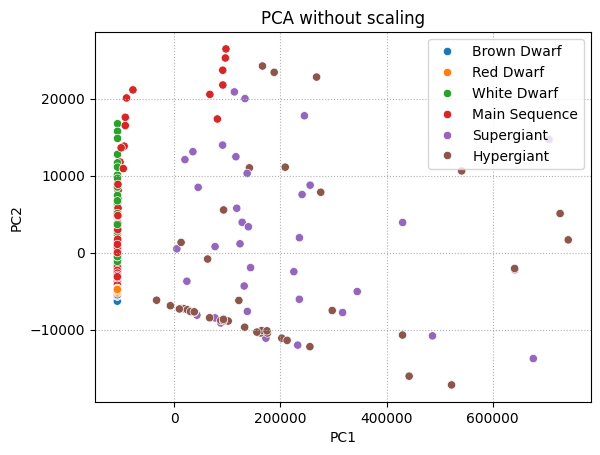

In [125]:
# PCA directly on Raw Data
pca = PCA()
X_pca_raw = pca.fit_transform(data)

# Plot
sns.scatterplot(x=X_pca_raw[:, 0], y=X_pca_raw[:, 1], hue = labels)
plt.title("PCA without scaling")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

This plot looks bad because the features have different units, like Kelvin vs. magnitude.

To get a better plot we have to rescale the data.

In [104]:
# Expalined variance
s = 0
for idx, r in enumerate(pca.explained_variance_ratio_):
    s += r
    print(f"Component {idx+1} explains {100*r:.1f}% of the variance (cumulative = {100*s:.1f}%)")

Component 1 explains 99.8% of the variance (cumulative = 99.8%)
Component 2 explains 0.2% of the variance (cumulative = 100.0%)
Component 3 explains 0.0% of the variance (cumulative = 100.0%)
Component 4 explains 0.0% of the variance (cumulative = 100.0%)


### Standard Scaler

Let's start trying with StandardScaler from `sklearn.preprocessing`.

In [105]:
# Scale the data: mean = 0, std = 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

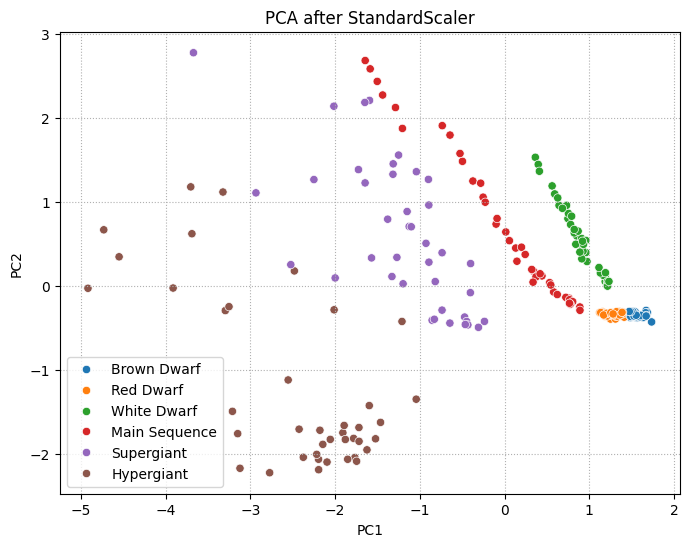

In [124]:
# PCA on Scaled Data
pca_scaled = PCA()
X_pca_scaled = pca_scaled.fit_transform(data_scaled)

# Plot
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = X_pca_scaled[:, 0], y = X_pca_scaled[:, 1], hue = labels)
plt.title("PCA after StandardScaler")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [107]:
# Expalined variance
s = 0
for idx, r in enumerate(pca_scaled.explained_variance_ratio_):
    s += r
    print(f"Component {idx+1} explains {100*r:.1f}% of the variance (cumulative = {100*s:.1f}%)")

Component 1 explains 60.4% of the variance (cumulative = 60.4%)
Component 2 explains 23.5% of the variance (cumulative = 83.9%)
Component 3 explains 9.3% of the variance (cumulative = 93.2%)
Component 4 explains 6.8% of the variance (cumulative = 100.0%)


That's better, but it still looks quite different from the HR diagram...

Let's try to work on the logarithm of the data

In [108]:
# Scale the data: mean = 0, std = 1
scaler = StandardScaler()
data_scaled_log = scaler.fit_transform(data_log)

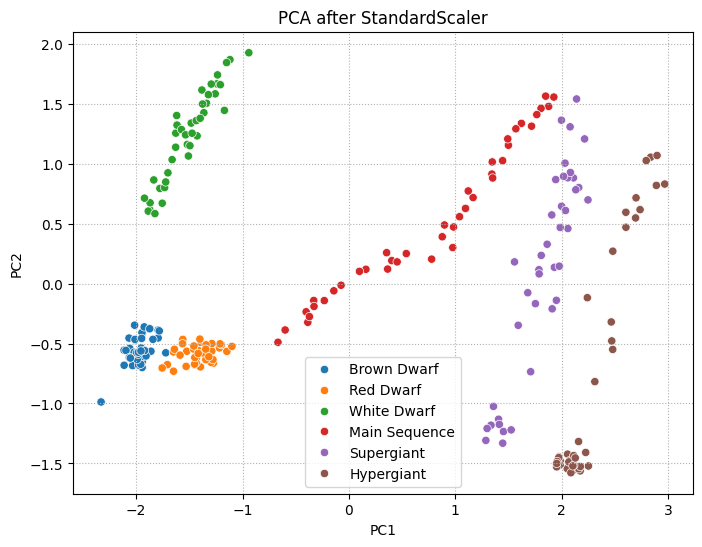

In [123]:
# PCA on Scaled log_data
pca_scaled_log = PCA()
X_pca_scaled_log = pca_scaled_log.fit_transform(data_scaled_log)

# Plot
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = X_pca_scaled_log[:, 0], y = X_pca_scaled_log[:, 1], hue = labels)
plt.title("PCA after StandardScaler")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

That's much better! Working on log_data returns a plot more similar to the HR diagram than working on the original data, so in the following sections I will always work on the log_data.

In [110]:
# Expalined variance
s = 0
for idx, r in enumerate(pca_scaled_log.explained_variance_ratio_):
    s += r
    print(f"Component {idx+1} explains {100*r:.1f}% of the variance (cumulative = {100*s:.1f}%)")

Component 1 explains 76.2% of the variance (cumulative = 76.2%)
Component 2 explains 22.0% of the variance (cumulative = 98.2%)
Component 3 explains 1.2% of the variance (cumulative = 99.4%)
Component 4 explains 0.6% of the variance (cumulative = 100.0%)


These two (unphysical) components are actually more informative than the physical quantities temperature and luminosity.

### MinMax Scaler $[-1, 1]$

In this section I will try a different standardization method: MinMaxScaler, always from `sklearn.preprocessing`, in the range $[-1, 1]$

In [111]:
# Scale the log_data in the range [-1, 1}
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
data_minmax = minmax_scaler.fit_transform(data_log)

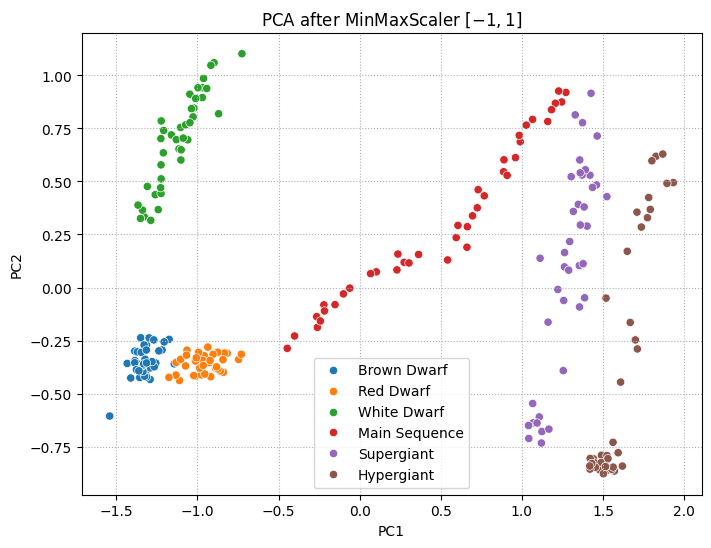

In [122]:
# PCA on Scaled log_data
pca_minmax = PCA()
X_pca_minmax = pca_minmax.fit_transform(data_minmax)

# Plot
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = X_pca_minmax[:, 0], y = X_pca_minmax[:, 1], hue = labels)
plt.title("PCA after MinMaxScaler $[-1, 1]$")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [113]:
# Expalined variance
s = 0
for idx, r in enumerate(pca_minmax.explained_variance_ratio_):
    s += r
    print(f"Component {idx+1} explains {100*r:.1f}% of the variance (cumulative = {100*s:.1f}%)")

Component 1 explains 81.8% of the variance (cumulative = 81.8%)
Component 2 explains 16.3% of the variance (cumulative = 98.1%)
Component 3 explains 1.2% of the variance (cumulative = 99.3%)
Component 4 explains 0.7% of the variance (cumulative = 100.0%)


## Unsupervised Clustering with K-Means

### Standard Scaler

In [135]:
# Apply clustering at scaled log_data
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca_scaled_log)

# Aggiungiamo il cluster al DataFrame
df_stars['Cluster'] = clusters

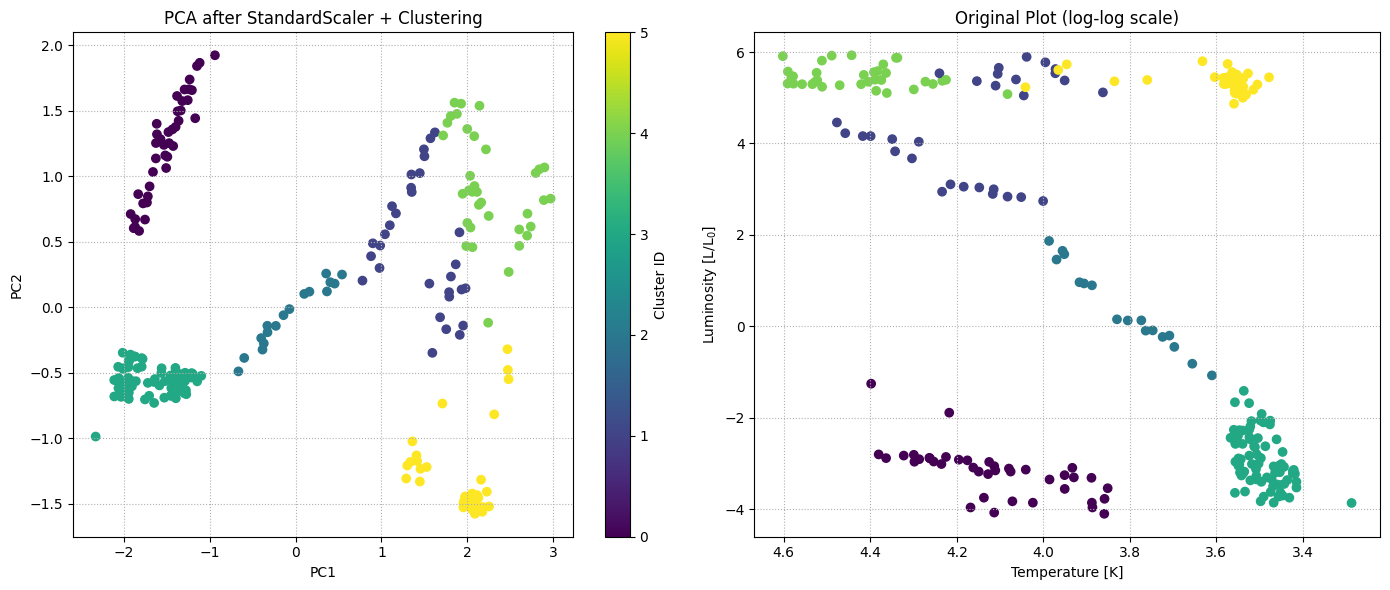

In [139]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA space
scatter1 = axes[0].scatter(X_pca_scaled_log[:, 0], X_pca_scaled_log[:, 1], c=clusters)
axes[0].set_title("PCA after StandardScaler + Clustering")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(linestyle=':')
# Add colorbar to the first plot only
cbar = fig.colorbar(scatter1, ax=axes[0], label='Cluster ID')

# Original (HR-like) space
scatter2 = axes[1].scatter(data_log[:, 0], data_log[:, 1], c=clusters)
axes[1].invert_xaxis()
axes[1].set_title("Original Plot (log-log scale)")
axes[1].set_xlabel("Temperature [K]")
axes[1].set_ylabel("Luminosity [L/L$_0$]")
axes[1].grid(linestyle=':')

plt.tight_layout()
plt.show()

### MinMax Scaler $[-1, 1]$

In [137]:
# Apply clustering at scaled log_data
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca_minmax)

# Aggiungiamo il cluster al DataFrame
df_stars['Cluster'] = clusters

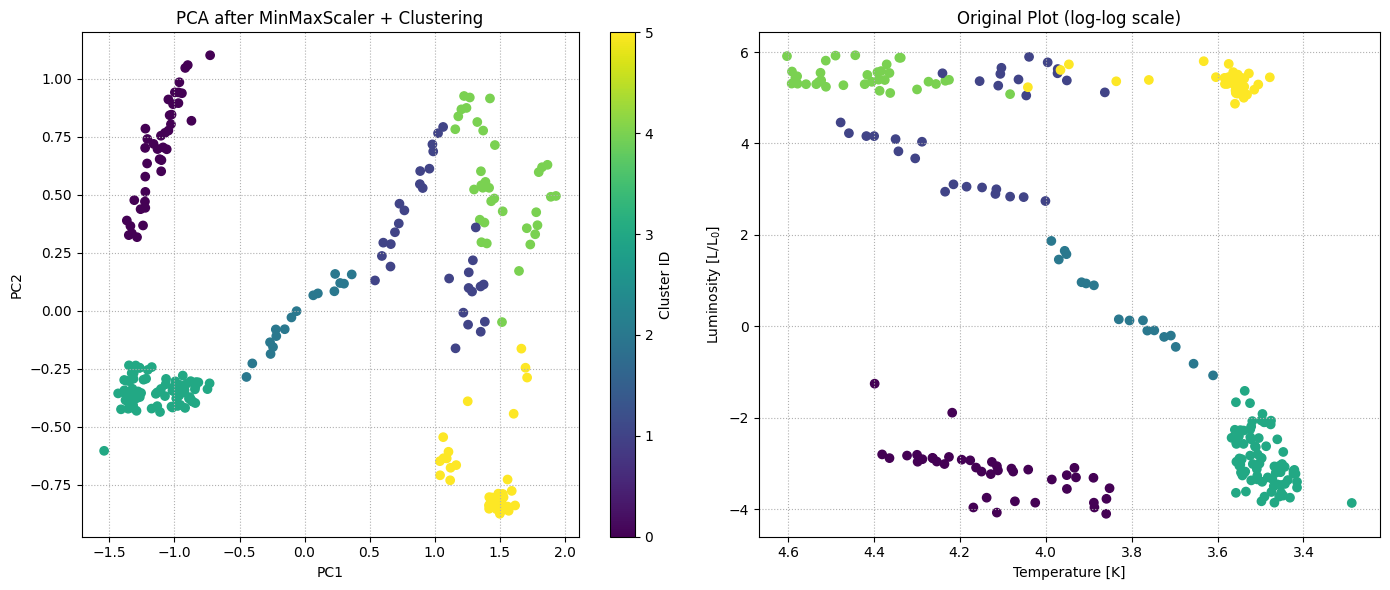

In [140]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA space
scatter1 = axes[0].scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=clusters)
axes[0].set_title("PCA after MinMaxScaler + Clustering")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(linestyle=':')
# Add colorbar to the first plot only
cbar = fig.colorbar(scatter1, ax=axes[0], label='Cluster ID')

# Original (HR-like) space
scatter2 = axes[1].scatter(data_log[:, 0], data_log[:, 1], c=clusters)
axes[1].invert_xaxis()
axes[1].set_title("Original Plot (log-log scale)")
axes[1].set_xlabel("Temperature [K]")
axes[1].set_ylabel("Luminosity [L/L$_0$]")
axes[1].grid(linestyle=':')

plt.tight_layout()
plt.show()

## Supervised Clustering with Logistic Regression

In [141]:
# Target labels (the star types)
y = df_stars['Star type']

### Standard Scaler

In [256]:
# Splitting (30% training and 70% test)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_scaled_log, y, test_size=0.7)

In [257]:
model = LogisticRegression(solver='saga', max_iter=10000, C=50)

clf = model.fit(X_train_scaled, y_train_scaled)
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

In [258]:
acc_train = accuracy_score(y_train_scaled, y_pred_train)
acc_test = accuracy_score(y_test_scaled, y_pred_test)

print(f"Accuracy training set: {acc_train:.3f}")
print(f"Accuracy validation set: {acc_test:.3f}")

Accuracy training set: 1.000
Accuracy validation set: 0.958


In [259]:
cm_train = confusion_matrix(y_train_scaled, y_pred_train)
cm_test = confusion_matrix(y_test_scaled, y_pred_test)

print("Confusion Matrix - Training Set")
print(cm_train)
print("\nConfusion Matrix - Test Set")
print(cm_test)

Confusion Matrix - Training Set
[[12  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 14]]

Confusion Matrix - Test Set
[[28  0  0  0  0  0]
 [ 0 32  0  0  0  0]
 [ 0  0 26  1  0  0]
 [ 0  0  0 27  0  0]
 [ 0  0  6  0 22  0]
 [ 0  0  0  0  0 26]]


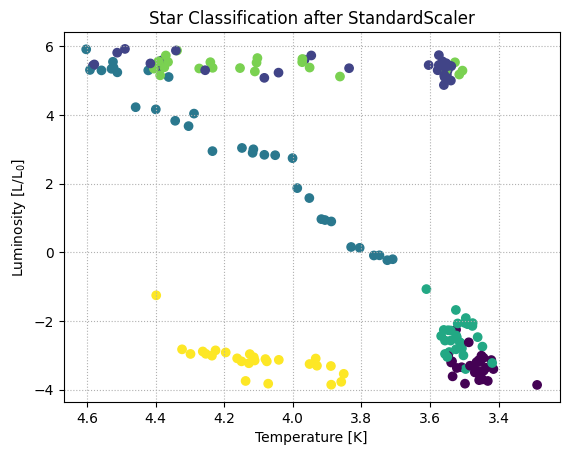

In [260]:
# Plot
X_original_test = scaler.inverse_transform(X_test_scaled)

plt.scatter(X_original_test[:, 0], X_original_test[:, 1],  c=y_pred_test)
plt.title("Star Classification after StandardScaler")
plt.xlabel("Temperature [K]")
plt.ylabel("Luminosity [L/L$_0$]")
plt.grid(linestyle = ":")
plt.gca().invert_xaxis()

plt.show()

### MinMax Scaler $[-1, 1]$

In [218]:
# Splitting (30% training and 70% test)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(data_minmax, y, test_size=0.7)

In [219]:
model = LogisticRegression(solver='saga', max_iter=10000, C=50)

clf = model.fit(X_train_minmax, y_train_minmax)
y_pred_train = clf.predict(X_train_minmax)
y_pred_test = clf.predict(X_test_minmax)

In [220]:
acc_train = accuracy_score(y_train_minmax, y_pred_train)
acc_test = accuracy_score(y_test_minmax, y_pred_test)

print(f"Accuracy training set: {acc_train:.3f}")
print(f"Accuracy validation set: {acc_test:.3f}")

Accuracy training set: 1.000
Accuracy validation set: 0.976


In [221]:
cm_train = confusion_matrix(y_train_minmax, y_pred_train)
cm_test = confusion_matrix(y_test_minmax, y_pred_test)

print("Confusion Matrix - Training Set")
print(cm_train)
print("\nConfusion Matrix - Test Set")
print(cm_test)

Confusion Matrix - Training Set
[[11  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 12]]

Confusion Matrix - Test Set
[[29  0  0  0  0  0]
 [ 0 29  0  0  0  0]
 [ 0  0 24  1  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  3  0 29  0]
 [ 0  0  0  0  0 28]]


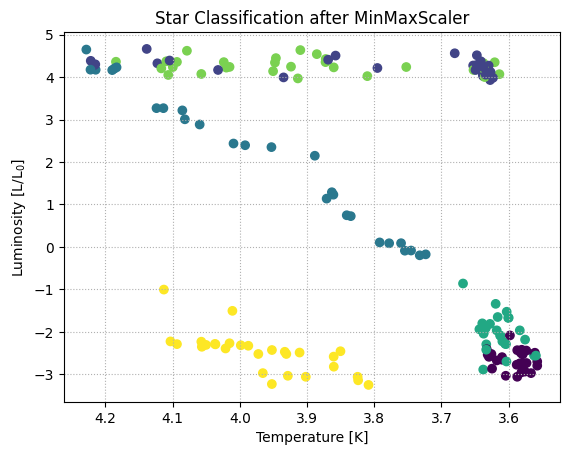

In [223]:
# Plot
X_original_test = scaler.inverse_transform(X_test_minmax)

plt.scatter(X_original_test[:, 0], X_original_test[:, 1],  c=y_pred_test)
plt.title("Star Classification after MinMaxScaler")
plt.xlabel("Temperature [K]")
plt.ylabel("Luminosity [L/L$_0$]")
plt.grid(linestyle = ":")
plt.gca().invert_xaxis()

plt.show()